In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import math

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

from sklearn import linear_model
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()

In [3]:
X = iris.data

Y = iris.target

In [4]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
iris_data = DataFrame(X, columns=['Seal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])

In [6]:
iris_target = DataFrame(Y, columns=['Species'])

In [9]:
def flower(num):
    if num == 0:
        return 'Setosa'
    elif num == 1:
        return 'Versicolour'
    else:
        return 'Virginica'

In [10]:
iris_target['Species'] = iris_target['Species'].apply(flower)

In [11]:
iris_target.tail()

,Species
145,Virginica
146,Virginica
147,Virginica
148,Virginica
149,Virginica


In [12]:
iris = pd.concat([iris_data, iris_target], axis=1)

In [13]:
iris.head()

,Seal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


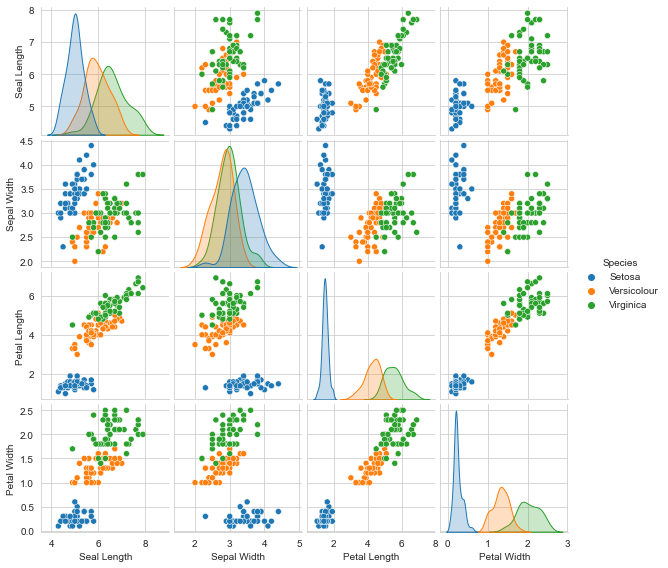

In [15]:
sns.pairplot(iris, hue='Species', size=2);

In [17]:
# sns.factorplot('Petal Length', data=iris, hue='Species', size=10)

### Multi-Class Classification with Sci Kit Learn

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [38]:
logreg = LogisticRegression()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4, random_state=3)



In [39]:
logreg.fit(X_train, Y_train)

LogisticRegression()

In [40]:
from sklearn import metrics

In [41]:
Y_pred = logreg.predict(X_test)

In [42]:
print(metrics.accuracy_score(Y_test, Y_pred))

0.9666666666666667


### K-Nearest Neighbors

In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [57]:
knn = KNeighborsClassifier(n_neighbors = 6)

In [58]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=6)

In [59]:
Y_pred = knn.predict(X_test)

In [60]:
print(metrics.accuracy_score(Y_test, Y_pred))

0.95


In [61]:
knn = KNeighborsClassifier(n_neighbors = 1)

In [64]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=1)

In [65]:
Y_pred = knn.predict(X_test)

In [66]:
print(metrics.accuracy_score(Y_test, Y_pred))

0.9666666666666667


In [67]:
k_range = range(1, 21)

accuracy = []

In [68]:
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)

    accuracy.append(metrics.accuracy_score(Y_test, Y_pred))

Text(0, 0.5, 'Testing Accuracy')

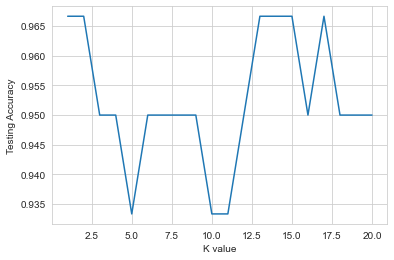

In [69]:
plt.plot(k_range, accuracy)
plt.xlabel('K value')
plt.ylabel('Testing Accuracy')